# <center>AI SATURDAYS DONOSTIA 2020<center>
## <center>Proyecto Práctico Equipo "FACEMOOD"</center>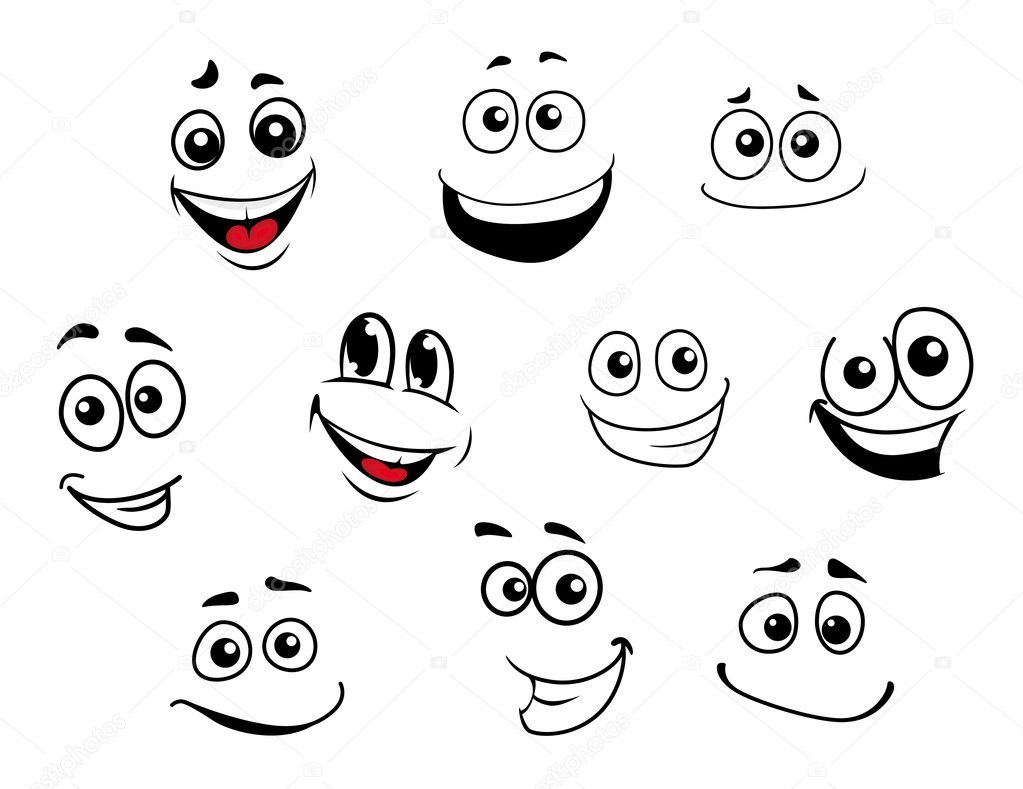

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Conjunto de Datos

In [2]:
df = pd.read_csv('../processed-data/tidy_socialmedia_data.csv', index_col=0)
df.drop('full_count', axis=1, inplace=True)
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Creación Índice de Depresión

In [3]:
df["DeprRate"]=0.33334*df["LowMood"]+0.33334*df["LossOfInt"]+0.33334*df["Hopeless"]
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,DeprRate
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,59.66786
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,57.66782
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,41.66750
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,44.66756
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,36.00072


### Nuevo Conjunto de Datos

In [4]:
df2 = df[["Participant","DeprRate","Fatigue", "Loneliness", "Concentrat", "Inferior", "Stress", "PSMU", "News", "ASMU"]]
print(df2.head())
df2.shape

   Participant  DeprRate  Fatigue  Loneliness  Concentrat  Inferior  Stress  \
1       115091  59.66786     61.0        61.0        64.0      50.0    73.0   
2       115091  57.66782     28.0        57.0        70.0      37.0    67.0   
3       115091  41.66750     24.0        44.0        70.0      26.0    39.0   
4       115091  44.66756     63.0        56.0        79.0      30.0    60.0   
6       115091  36.00072     16.0         0.0        27.0      15.0    25.0   

   PSMU  News  ASMU  
1  66.0  39.0  38.0  
2   0.0  27.0  23.0  
3  63.0  34.0  36.0  
4  67.0  29.0  23.0  
6  16.0   0.0   0.0  


(8687, 10)

In [5]:
df2.describe()

,Participant,DeprRate,Fatigue,Loneliness,Concentrat,Inferior,Stress,PSMU,News,ASMU
count,8.687000e+03,8640.000000,8652.000000,8646.000000,8643.000000,8646.000000,8648.000000,8644.000000,8647.000000,8645.000000
mean,5.356340e+06,16.895322,36.987171,11.971085,26.389795,10.583854,20.639801,31.604350,20.804788,21.410642
std,2.843309e+06,16.338343,29.717460,16.962882,26.086166,15.485521,23.184786,29.214782,24.890481,25.321793
min,1.150910e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.065915e+06,2.666720,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.441446e+06,13.333600,30.000000,5.000000,19.000000,3.000000,14.000000,24.000000,12.000000,12.000000
75%,8.055680e+06,25.667180,64.000000,18.000000,45.000000,17.000000,30.000000,61.000000,31.000000,33.000000
max,9.873359e+06,99.001980,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Medias por Participante

In [6]:
dfmean=df2.groupby('Participant').mean()
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(dfmean)
print(dfmean.shape)

(125, 9)


In [7]:
dfmean.describe()

,DeprRate,Fatigue,Loneliness,Concentrat,Inferior,Stress,PSMU,News,ASMU
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,16.684111,37.066547,11.900892,26.568285,10.360674,20.555942,31.265974,20.329226,21.265517
std,10.882924,17.373640,11.066729,14.376593,10.527341,14.524215,14.071410,15.665447,15.387645
min,0.293866,0.802469,0.000000,0.474359,0.000000,0.180556,3.342857,0.308642,0.314815
25%,8.114086,24.202532,2.176471,15.574713,1.319149,8.222222,21.041667,6.705882,9.189189
50%,16.159527,38.150000,9.140625,25.810127,6.448276,19.634921,30.159420,16.566265,20.867647
75%,23.976670,49.244186,19.063492,35.333333,17.231884,32.277108,38.915493,31.017241,28.971831
max,51.953980,78.378947,53.788235,70.562500,52.658824,61.482353,75.413043,72.393939,77.863636


### Diagrama de Matriz para las Medias de las 9 Variables

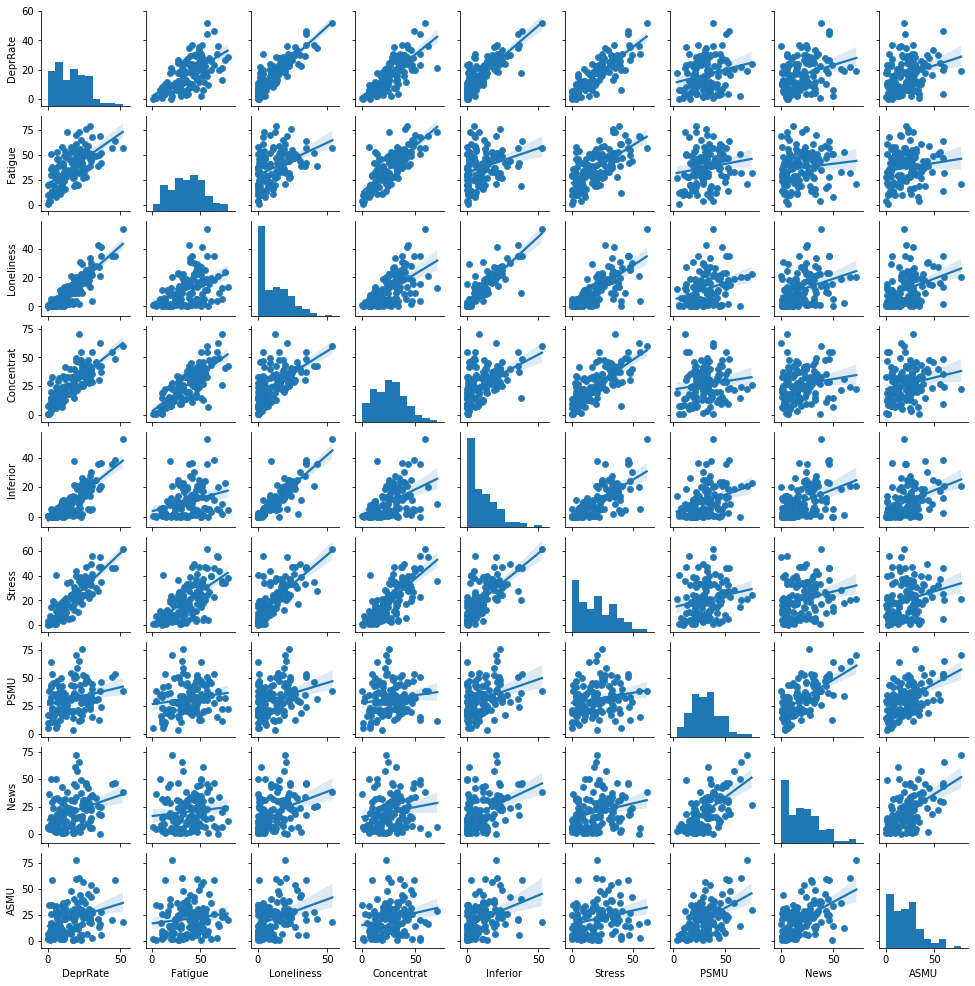

In [8]:
g = sns.PairGrid(dfmean, height=1.5)
g.map_offdiag(sns.scatterplot)
g.map_offdiag(sns.regplot)
g.map_diag(plt.hist)

### Correlaciones de Pearson para las Medias de las 9 Variables

Text(0.5, 1, 'Heatmap of Correlation Matrix - Means by Participant')

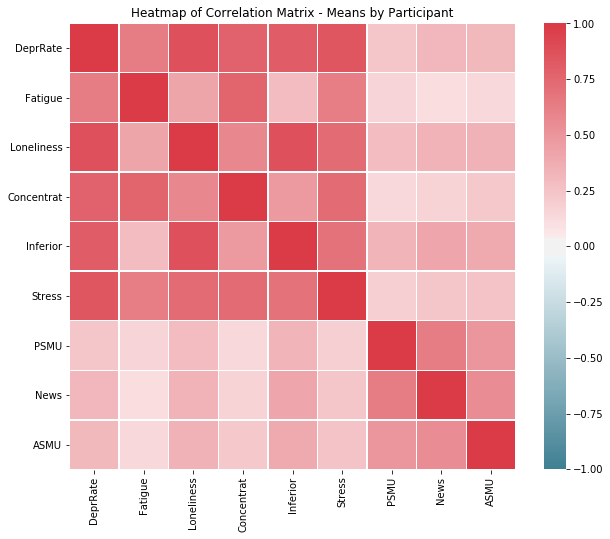

In [9]:
corr = dfmean.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=1, vmin=-1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix - Means by Participant')

In [10]:
print(corr)

            DeprRate   Fatigue  Loneliness  Concentrat  Inferior    Stress  \
DeprRate    1.000000  0.632913    0.873127    0.775639  0.812381  0.847804   
Fatigue     0.632913  1.000000    0.414944    0.765596  0.294038  0.629350   
Loneliness  0.873127  0.414944    1.000000    0.584262  0.867703  0.727096   
Concentrat  0.775639  0.765596    0.584262    1.000000  0.478082  0.729697   
Inferior    0.812381  0.294038    0.867703    0.478082  1.000000  0.687907   
Stress      0.847804  0.629350    0.727096    0.729697  0.687907  1.000000   
PSMU        0.238592  0.158909    0.295886    0.139219  0.328546  0.189035   
News        0.314299  0.115318    0.340172    0.169265  0.411115  0.240480   
ASMU        0.304916  0.137964    0.351500    0.220335  0.386622  0.251279   

                PSMU      News      ASMU  
DeprRate    0.238592  0.314299  0.304916  
Fatigue     0.158909  0.115318  0.137964  
Loneliness  0.295886  0.340172  0.351500  
Concentrat  0.139219  0.169265  0.220335  
Infe

### Se observan correlaciones más significativas entre las siguientes variables:

DeprRate vs Loneliness

DeprRate vs Inferior

DeprRate vs Stress

Loneliness vs Inferior

### Regresión Lineal para las Medias: y = DeprRate, X = Demás Variables

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets

label = dfmean.DeprRate

dfmean.drop('DeprRate', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.06232263  0.32192406  0.19639025  0.24804551  0.140897   -0.04767971
  0.04044804 -0.02727695] 1.119621217836901
Fatigue       0.037151
Loneliness    0.000007
Concentrat    0.000039
Inferior      0.000518
Stress        0.001114
PSMU          0.273379
News          0.253010
ASMU          0.431205
Name: P>|t|, dtype: float64


In [13]:
# R2 del primer ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.3f}'.format(reg.score(X_train, y_train)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.3f}'.format(reg.score(X_test, y_test)))

R2 Coefficient for Linear Regression Model with Training Data: 0.912
R2 Coefficient for Linear Regression Model with Testing Data: 0.906


### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [14]:
# Eliminación de 1 variable con alto p-value (> 0,4)

dfmean.drop('ASMU', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [15]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.06962963  0.31582664  0.18587299  0.25310019  0.14360029 -0.05471294
  0.02947663] 0.9810176198134481
Fatigue       0.022735
Loneliness    0.000008
Concentrat    0.000047
Inferior      0.000400
Stress        0.000895
PSMU          0.144541
News          0.354370
Name: P>|t|, dtype: float64


In [16]:
# Eliminación de 1 variable con alto p-value (> 0,35)

dfmean.drop('News', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [17]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.07002453  0.31149805  0.18084209  0.26822911  0.1464247  -0.0350677 ] 0.9038934813801003
Fatigue       0.022937
Loneliness    0.000010
Concentrat    0.000062
Inferior      0.000139
Stress        0.000703
PSMU          0.253609
Name: P>|t|, dtype: float64


In [18]:
# Eliminación de 1 variable con alto p-value (> 0,25)

dfmean.drop('PSMU', axis=1, inplace=True)
# print(dfmean)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

# print(X_train)
# print(y_train)

### Modelo Final Medias

In [19]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [0.05943224 0.30838946 0.19016275 0.24959574 0.15387125] -0.02458990116711135
Fatigue       0.047854
Loneliness    0.000009
Concentrat    0.000046
Inferior      0.000256
Stress        0.000347
Name: P>|t|, dtype: float64


### Análisis de Residuos Modelo Final

Text(0.5, 1.0, 'Gráfica de Residuos')

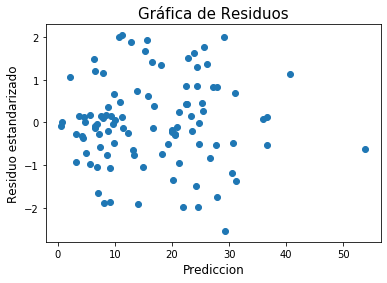

In [20]:
#create instance of influence
influence = fitt.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(fitt.predict(), standardized_residuals)
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

Text(0.5, 1.0, 'Histograma Residuos Estandarizados')

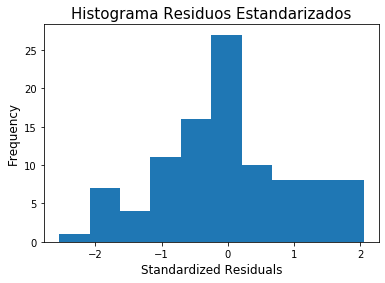

In [21]:
plt.hist(standardized_residuals)
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

Text(0.5, 1.0, 'Normal Q-Q Plot')

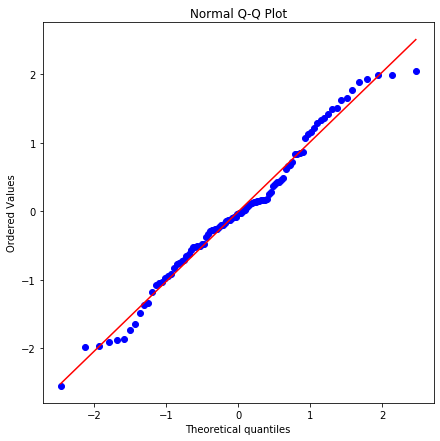

In [22]:
!pip install scipy
from scipy import stats

plt.figure(figsize=(7,7))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Conclusión del Análisis de Residuos: El Análisis de Residuos puede ser considerado satisfactorio bajo un punto de vista estadístico.

###  

### Evaluación Final Modelo "Medias"

In [23]:
# Evaluación del Error Medio del último ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(data_train) - label_train)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

RMSE of Linear Regression Model with Training Data: 3.22
RMSE of Linear Regression Model with Testing Data: 3.46


In [24]:
# R2 del último ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.3f}'.format(reg.score(data_train, label_train)))
print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.3f}'.format(reg.score(X_test, y_test)))

R2 Coefficient for Linear Regression Model with Training Data: 0.908
R2 Coefficient for Linear Regression Model with Testing Data: 0.913


### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (91,3%). Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.
### DeprRate = -0,025 + 0,059 Fatigue + 0,308 Loneliness + 0,190 Concentrat + 0,250 Inferior + 0,154 Stress